In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
PATH="C:\\Users\\Lenovo\\Desktop\\izenda\\estimate_total_new_data\\Izenda_data_thru_201712 ver4c.csv"

In [4]:
original = pd.read_csv(PATH) 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
original.describe()

,LossYearMo,StartedFlag,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,Estimate_NetClaim,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID
count,1471001.000,1898445.000,1897219.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000,1898445.000
mean,201629.311,0.451,172.737,37.325,1.008,0.993,91566.138,44564.337,207.860,1547.299,1433.923,10.526,8.560,225.224,11.273,8.252,534218.658
std,198.595,0.498,14368.802,269.558,0.122,0.088,11315996.574,1303840.740,8476.643,45614.169,46224.602,57.652,48.648,6176.272,637.002,6.384,301300.412
min,191602.000,0.000,1.000,0.000,1.000,0.000,-339932.600,-360488744.000,-29696.000,-15066.000,-15066.000,-1692.000,-1692.000,0.000,0.000,1.000,1.000
25%,201512.000,0.000,4.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,292919.000
50%,201704.000,0.000,12.000,2.000,1.000,1.000,285.000,318.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,501997.000
75%,201803.000,1.000,62.000,23.000,1.000,1.000,10892.190,10606.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,798278.000
max,204410.000,1.000,16405200.000,149121.000,35.000,9.000,12174319336.000,646163204.000,5588347.000,21789906.000,21789906.000,15300.000,15300.000,4200000.000,420300.000,17.000,1141548.000


In [6]:
original.head(1)

,DisplayName,DivisionName,LossAddressZip,City,Zip,State,LossYearMo,StartedFlag,LossType,CommOrRes,...,Estimate_NetClaim,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID
0,Contents,Evans Textile Restoration,2,Emerald Isle,28594,NC,201809.000,0,NaN,Residential-Homeowner,...,0,0,0,0,0,0,0,0,7,70416


Text(0,0.5,'Estimate_NetClaim')

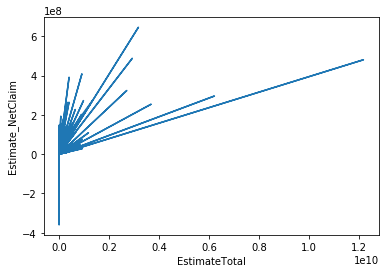

In [7]:
plt.plot(original['EstimateTotal'], original['Estimate_NetClaim'])
plt.xlabel('EstimateTotal')
plt.ylabel('Estimate_NetClaim')

In [8]:
features = ['Estimate_NetClaim','Estimate_Deductible','Estimate_BaseSvcCharge','EstimateTotal']
# ,'Estimate_MaterialSaleTax','Estimate_OverHead','Estimate_Profit','Estimate_PctOverhead'

In [9]:
# sns.set()
# sns.pairplot(original[features],height=3)
# plt.show()

Text(0,0.5,'Estimate_NetClaim')

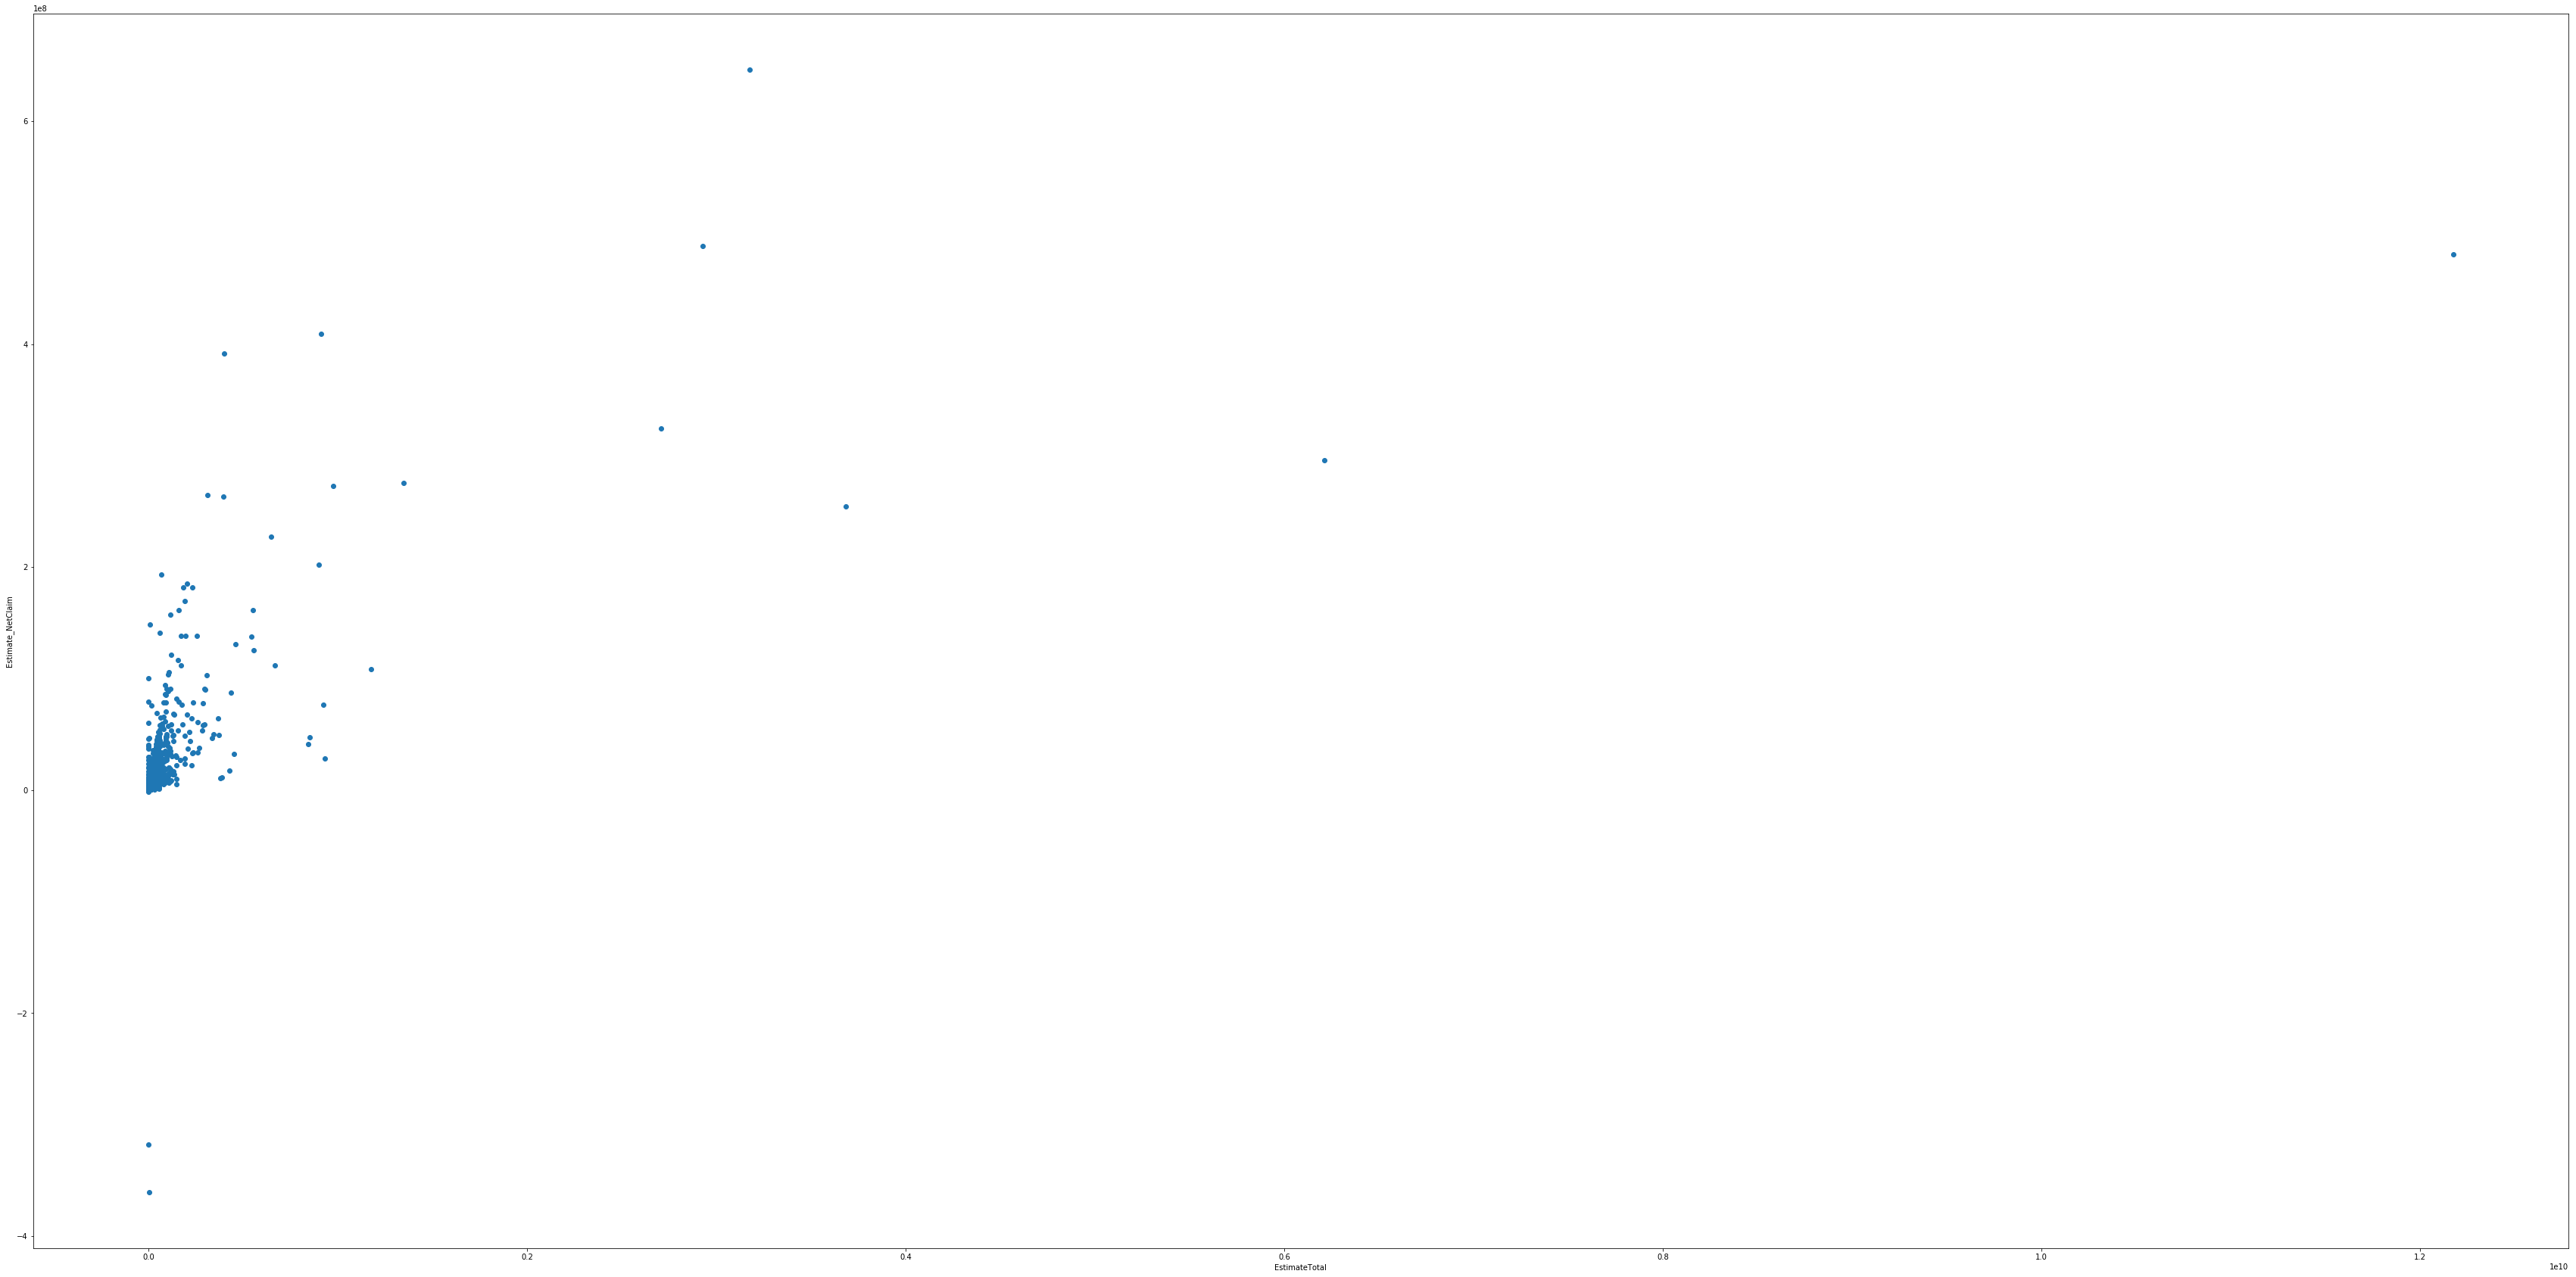

In [10]:
plt.figure(figsize=(60,30))
# plt.xticks(np.arange(min(original['Estimate_NetClaim']), max(original['Estimate_NetClaim'])+1, 10000))
plt.scatter(original['EstimateTotal'], original['Estimate_NetClaim'])
plt.xlabel('EstimateTotal')
plt.ylabel('Estimate_NetClaim')

Text(0,0.5,'Estimate_MaterialSaleTax')

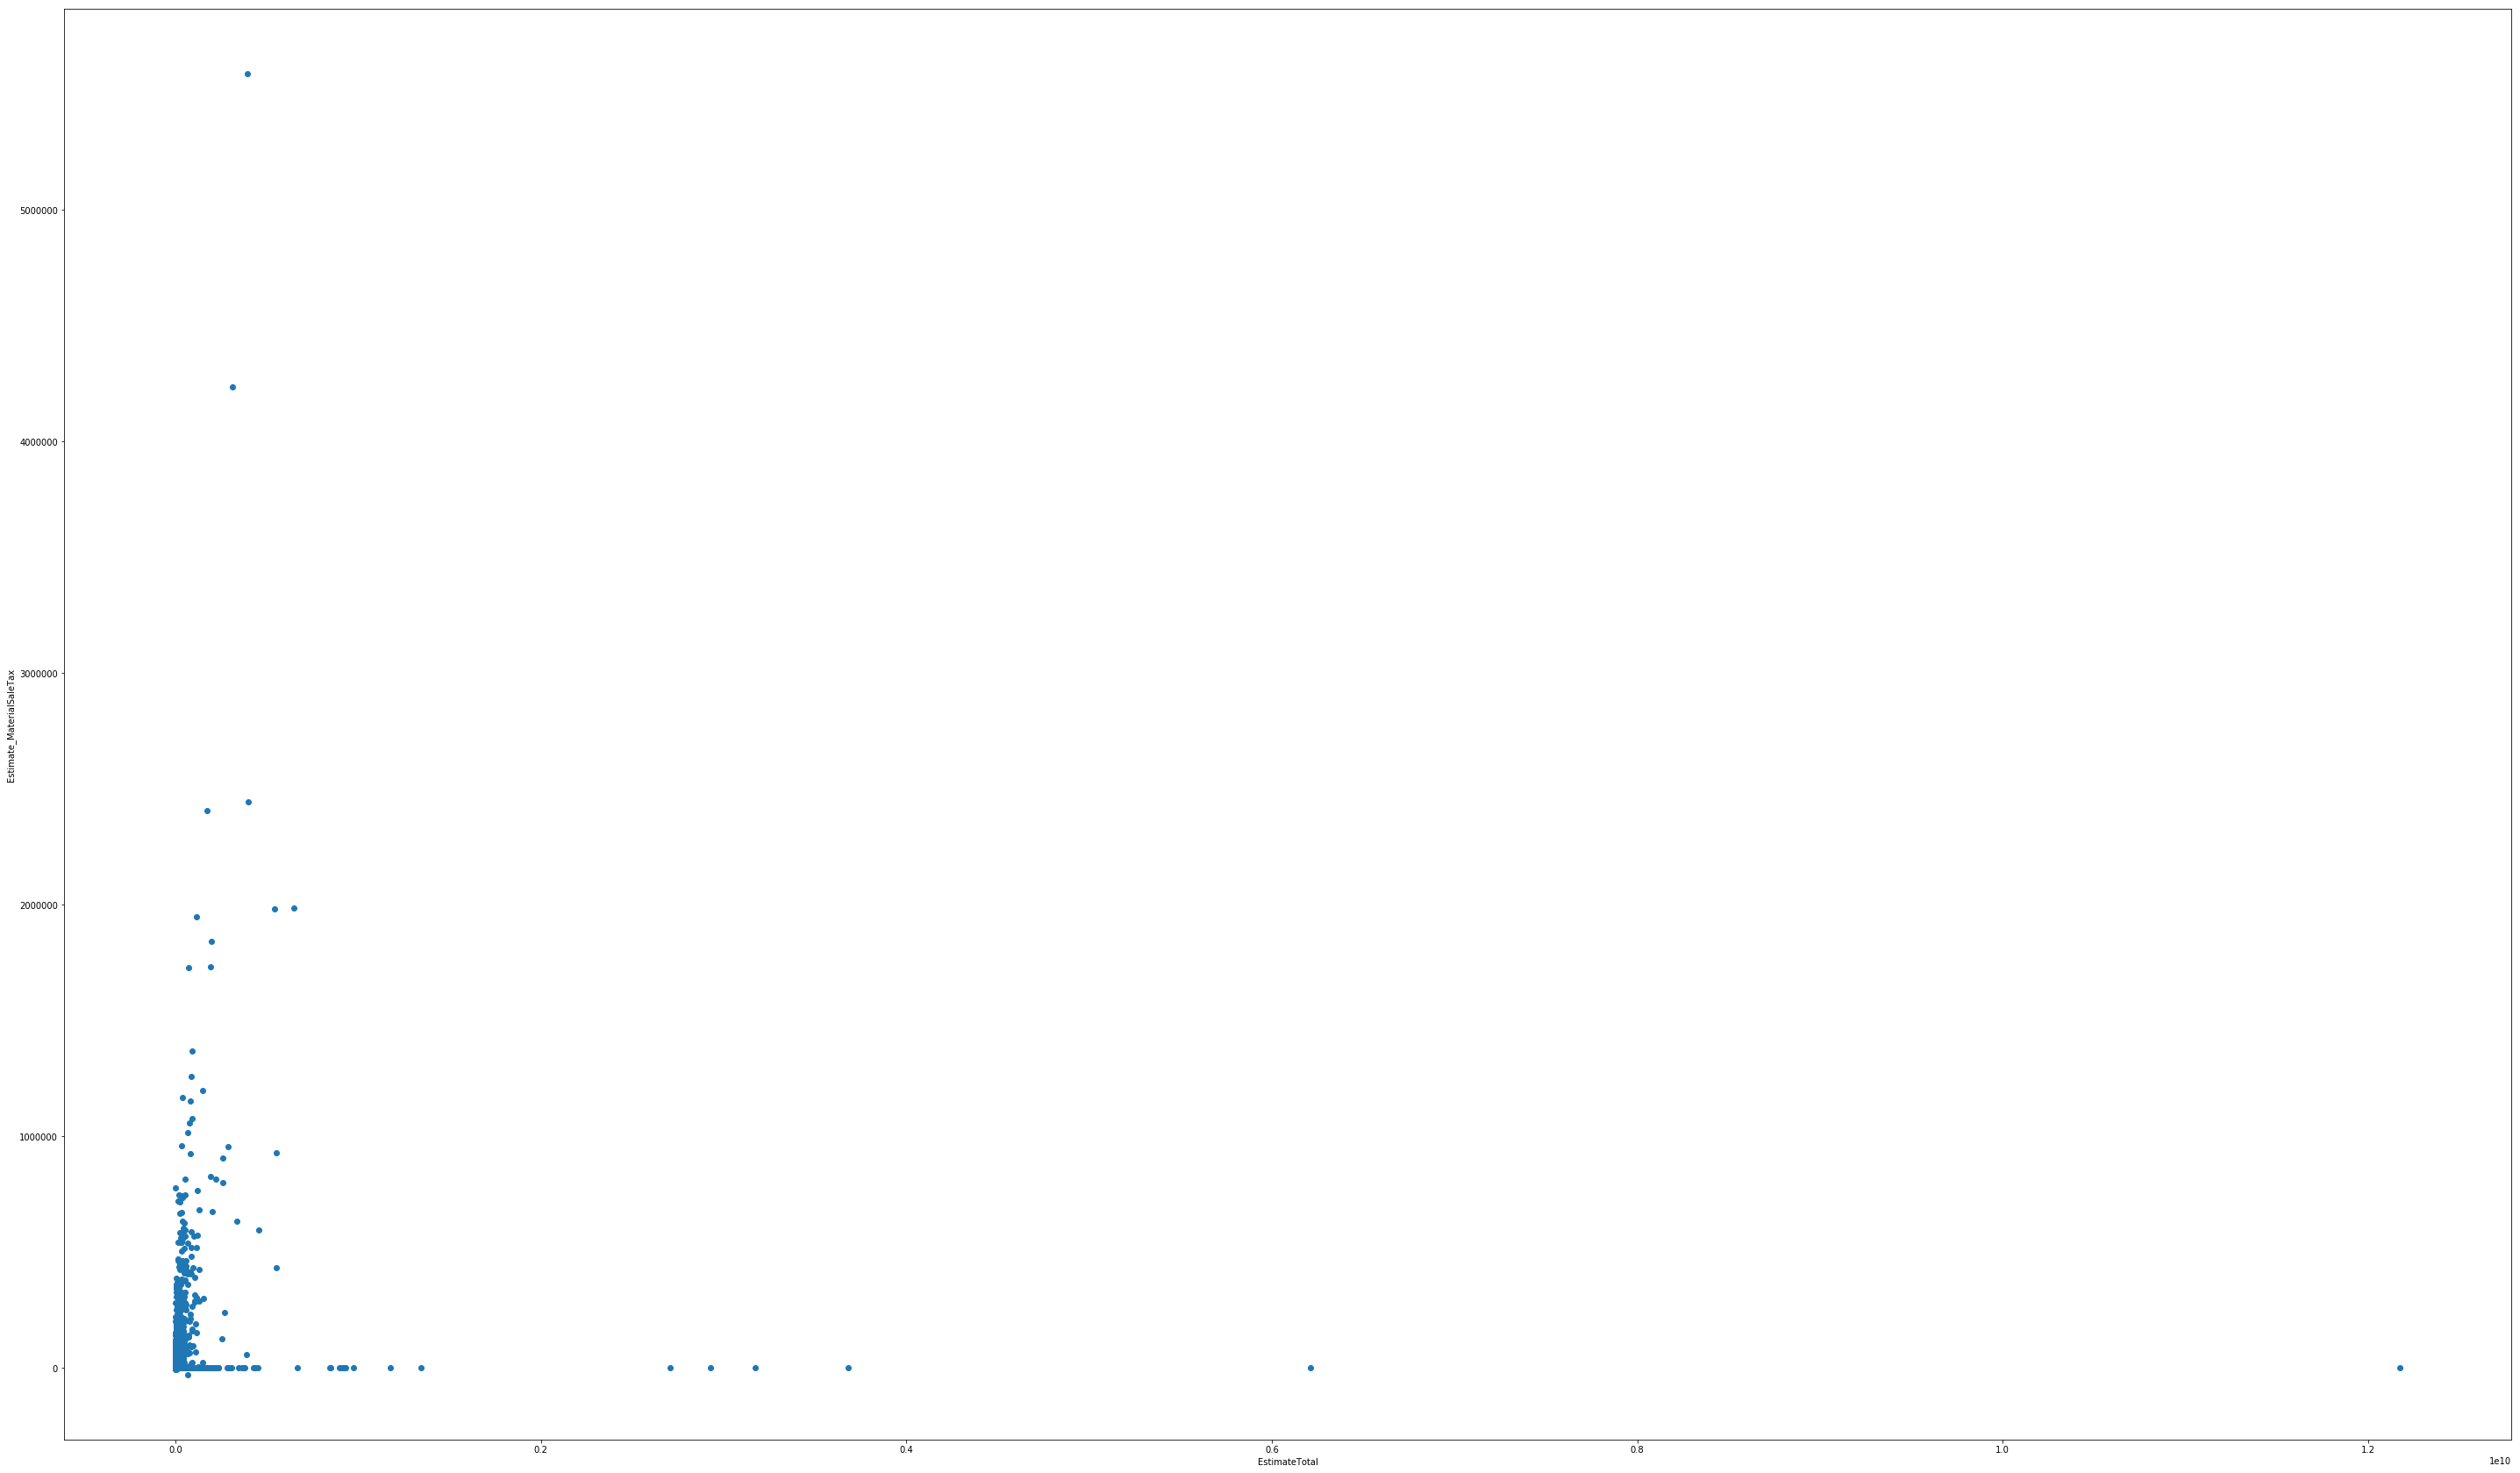

In [11]:
plt.figure(figsize=(50,30))
plt.scatter(original['EstimateTotal'], original['Estimate_MaterialSaleTax'])
plt.xlabel('EstimateTotal')
plt.ylabel('Estimate_MaterialSaleTax')

Text(0,0.5,'Estimate_Deductible')

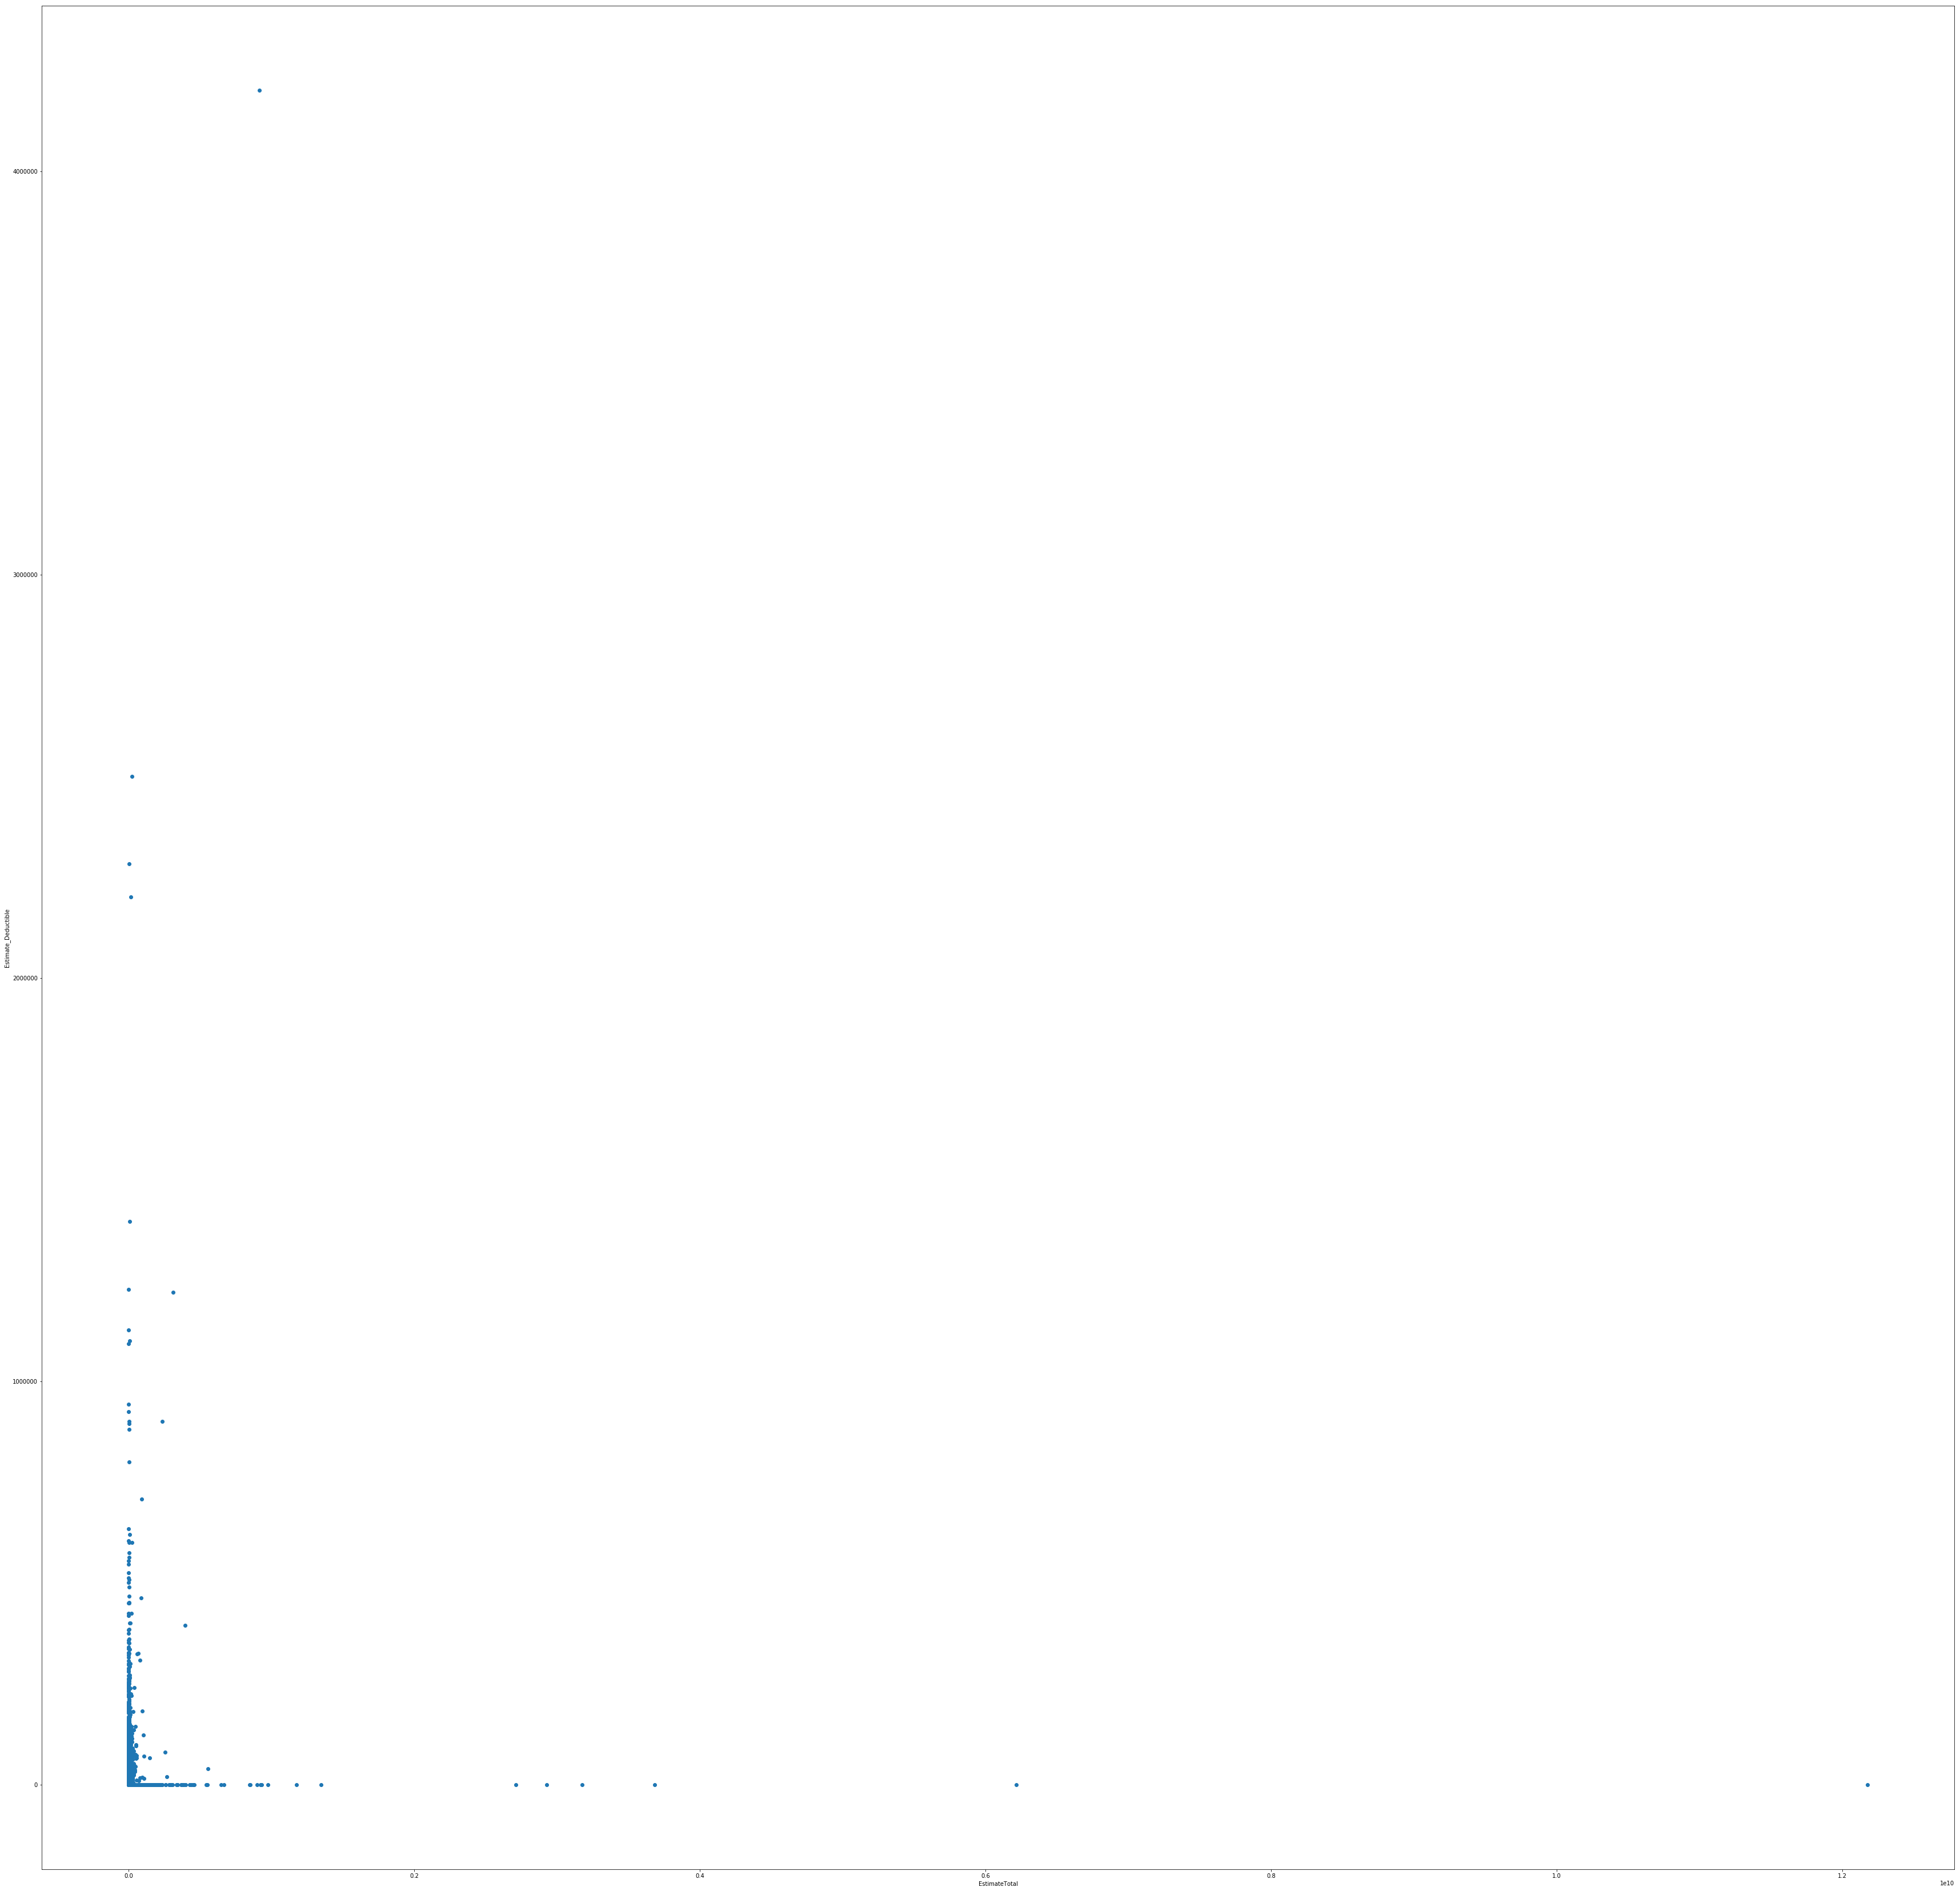

In [12]:
plt.figure(figsize=(60,60))
plt.scatter(original['EstimateTotal'], original['Estimate_Deductible'])
plt.xlabel('EstimateTotal')
plt.ylabel('Estimate_Deductible')

Text(0,0.5,'Estimate_BaseSvcCharge')

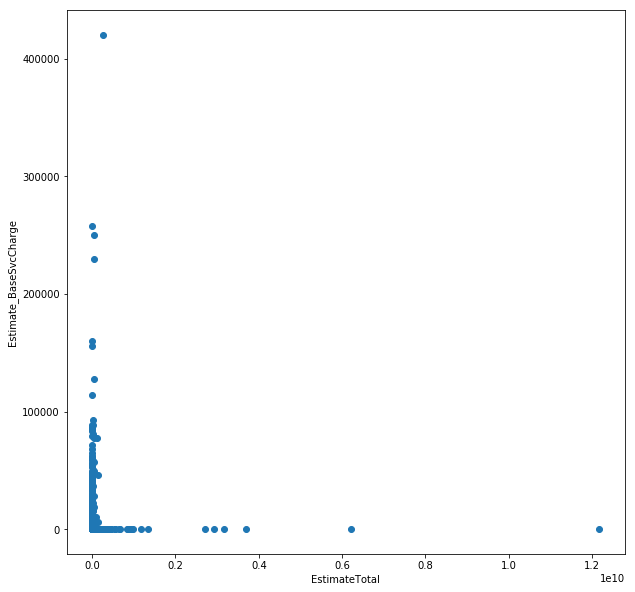

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(original['EstimateTotal'], original['Estimate_BaseSvcCharge'])
plt.xlabel('EstimateTotal')
plt.ylabel('Estimate_BaseSvcCharge')

In [14]:
features_corr = ['Estimate_NetClaim','Estimate_Deductible','Estimate_BaseSvcCharge','EstimateTotal' ,'Estimate_MaterialSaleTax','Estimate_OverHead','Estimate_Profit','Estimate_PctOverhead']

In [15]:
alldata_nas = original.isnull().sum().sort_values(ascending=False)
percent_nas = round(((original.isnull().sum()/original.isnull().count())*100),2).sort_values(ascending=False)
alldata_nas = pd.concat([alldata_nas,percent_nas],axis=1,keys=['Total','Percent'])
alldata_nas.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
City,80,0.000
ClaimCount,0,0.000
CleanAddressContactID,0,0.000
CleanAddressFranchisorID,0,0.000
CommOrRes,294523,15.510
DisplayName,0,0.000
DivisionName,1,0.000
EstimateTotal,0,0.000
Estimate_BaseSvcCharge,0,0.000
Estimate_Deductible,0,0.000


In [16]:
x=original['Estimate_NetClaim']
y=original['EstimateTotal']

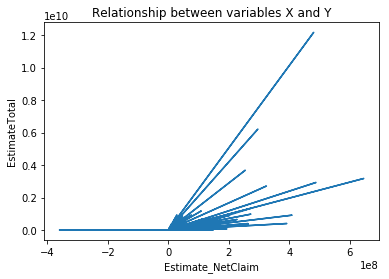

In [17]:


### Creating a figure to plot the graph.  
fig, ax = plt.subplots()  
ax.plot(x, y)  
ax.set_xlabel('Estimate_NetClaim')  
ax.set_ylabel('EstimateTotal')  
ax.set_title('Relationship between variables X and Y')  
plt.show() # display the graph  
### if %matplotlib inline has been invoked already, then plt.show() is automatically invoked and the plot is displayed in the same window.  


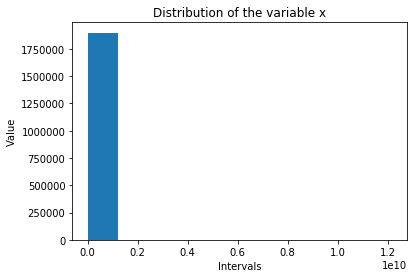

In [18]:


plt.hist(y)  
plt.xlabel('Intervals')  
plt.ylabel('Value')  
plt.title('Distribution of the variable x')  
plt.show()  


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


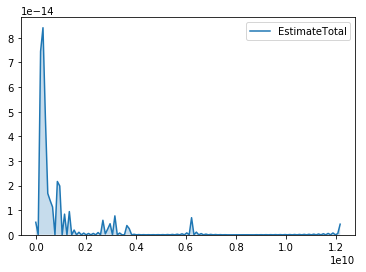

In [19]:
### Let's assume random data stored in variable 'x'.  
fig, ax = plt.subplots()  
### Generating random data  
sns.kdeplot(y, shade=True, ax=ax)  
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


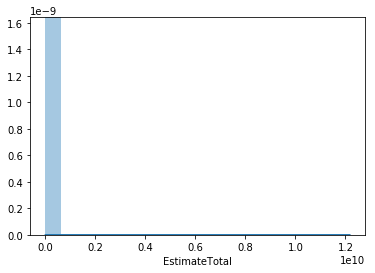

In [20]:
### Generating a random sample  
### Plotting the distplot  
sns.distplot(y, bins=20)  
 

In [21]:
original.corr()

,LossYearMo,StartedFlag,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,Estimate_NetClaim,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID
LossYearMo,1.000,-0.070,-0.001,0.001,0.005,0.009,-0.001,-0.000,-0.003,-0.002,-0.004,-0.004,-0.010,0.005,-0.052,0.277,0.477
StartedFlag,-0.070,1.000,0.011,0.098,0.001,0.028,0.007,0.026,0.019,0.024,0.022,0.130,0.128,0.027,0.014,0.008,0.016
NoteCount,-0.001,0.011,1.000,0.562,0.001,0.001,0.551,0.357,0.043,0.044,0.050,0.050,0.053,0.010,0.013,-0.002,-0.000
PhotoCount,0.001,0.098,0.562,1.000,0.009,0.006,0.519,0.465,0.207,0.204,0.206,0.279,0.295,0.053,0.078,0.001,0.009
JobCount,0.005,0.001,0.001,0.009,1.000,0.076,0.002,0.008,0.009,0.011,0.012,0.022,0.022,0.003,-0.000,-0.012,-0.025
ClaimCount,0.009,0.028,0.001,0.006,0.076,1.000,0.001,0.003,0.002,0.003,0.003,0.016,0.015,0.003,0.001,-0.047,-0.061
EstimateTotal,-0.001,0.007,0.551,0.519,0.002,0.001,1.000,0.608,0.086,0.116,0.118,0.053,0.060,0.040,0.014,-0.002,-0.002
Estimate_NetClaim,-0.000,0.026,0.357,0.465,0.008,0.003,0.608,1.000,0.415,0.513,0.514,0.196,0.213,0.180,0.034,-0.006,-0.002
Estimate_MaterialSaleTax,-0.003,0.019,0.043,0.207,0.009,0.002,0.086,0.415,1.000,0.700,0.706,0.324,0.380,0.118,0.095,-0.010,-0.005
Estimate_OverHead,-0.002,0.024,0.044,0.204,0.011,0.003,0.116,0.513,0.700,1.000,0.967,0.402,0.424,0.311,0.075,-0.006,-0.011


In [22]:
dataUpto2017=original[original["LossYearMo"].apply(lambda x:x<201801)]

In [23]:
dataUpto2017=dataUpto2017.drop(['DisplayName','City','Zip','State','LossYearMo','StartedFlag','LossType','LossDescription','DivisionName','LossSourceDisplayName','CommOrRes','LossAddressZip'], axis=1)

In [24]:
dataUpto2017

,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,PolicyHolderType,Estimate_NetClaim,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID
6,468.000,34,1,1,0.000,Individual,0,0,0,0,0,0,0,0,7,67547
108,8.000,2,1,1,0.000,Individual,0,0,0,0,0,0,0,0,7,29324
109,1.000,0,1,1,5241.890,Individual,5241,0,0,0,0,0,0,0,7,66150
111,148.000,119,1,1,59719.520,Individual,59719,0,0,0,0,0,0,0,7,5161
114,231.000,69,1,1,10674.730,Individual,10674,0,0,0,0,0,0,0,7,4183
115,18.000,24,1,1,136546.680,Individual,136546,0,0,0,0,0,0,0,7,4111
116,272.000,82,1,1,117388.740,Individual,117388,0,0,0,0,0,0,0,7,29489
126,4.000,0,1,1,192.150,Individual,192,0,0,0,0,0,0,0,7,693
127,15.000,4,1,1,1787.640,Individual,1787,0,0,0,0,0,0,0,7,425
128,12.000,2,1,1,3826.400,Individual,3826,0,0,0,0,0,0,0,7,761


In [25]:
# dataUpto2017['CommOrRes'].describe()


In [26]:
# from string import punctuation
# import re 

# dataUpto2017['CommOrRes'] = dataUpto2017['CommOrRes'].str.lower()
# dataUpto2017['CommOrRes'] = dataUpto2017['CommOrRes'].replace('[^a-zA-Z0-9]', ' ', regex = True)
 

# def remove_num(text):
#     text= re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", str(text))
#     return text
# dataUpto2017['CommOrRes'] = np.vectorize(remove_num)(dataUpto2017['CommOrRes'])

# def lower_case(text):
#     row = text.lower()
#     return row
# dataUpto2017['CommOrRes'] = np.vectorize(lower_case)(dataUpto2017['CommOrRes'])


# def remove_punct(text):
#     text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
#     return text
# dataUpto2017['CommOrRes'] = np.vectorize(remove_punct)(dataUpto2017['CommOrRes'])

# def remove_extra_space(text):
#     word_list = text.split()
#     text = ' '.join(word_list)
#     return text
# dataUpto2017['CommOrRes'] = np.vectorize(remove_extra_space)(dataUpto2017['CommOrRes'])

In [27]:
# dataUpto2017['CommOrRes'].describe()

In [28]:
# dataUpto2017['CommOrRes'].unique()

In [29]:
# match = re.search(r"hello\W+world\W+is\W+a\W+good\W+idea\W+for\W+a\W+T-shirt", text)

In [30]:
# def resi_convert(text):
#     words=text.split()
#     for word in words:
#         if ('multi family' in text or 'res' in text or 'multifamily' in text):
#             text = 'residential'
#         elif('industrial' in text):
#             text = 'commercial'
#         elif ('church' in text or 'religious' in text):
#             text='community'
#         elif ('school' in text or 'com' in text or 'healthcare' in text or 'health care' in text):
#             text='community'
#         else:
#             pass
#         return text
# dataUpto2017['CommOrRes'] = np.vectorize(resi_convert)(dataUpto2017['CommOrRes'])

In [31]:
# dataUpto2017['CommOrRes'].describe()

In [32]:
# def pattern_match(text):
#     match = re.search(r"residential", text)
#     match1 = re.search(r"commercial", text)
#     match2 = re.search(r"government", text)
#     if match:
#         text='residential'
#     elif match1:
#         text='commercial'
#     elif match2:
#         text='government'
#     else:
#         pass
#     return text
# dataUpto2017['CommOrRes'] = np.vectorize(pattern_match)(dataUpto2017['CommOrRes'])

In [33]:
# dataUpto2017['CommOrRes'].describe()

In [34]:
# dataUpto2017['CommOrRes'].unique()

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataUpto2017.head(1)

,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,PolicyHolderType,Estimate_NetClaim,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID
6,468.000,34,1,1,0.000,Individual,0,0,0,0,0,0,0,0,7,67547


In [36]:
alldata_nas = dataUpto2017.isnull().sum().sort_values(ascending=False)
percent_nas = round(((dataUpto2017.isnull().sum()/dataUpto2017.isnull().count())*100),2).sort_values(ascending=False)
alldata_nas = pd.concat([alldata_nas,percent_nas],axis=1,keys=['Total','Percent'])
alldata_nas.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
ClaimCount,0,0.000
CleanAddressContactID,0,0.000
CleanAddressFranchisorID,0,0.000
EstimateTotal,0,0.000
Estimate_BaseSvcCharge,0,0.000
Estimate_Deductible,0,0.000
Estimate_MaterialSaleTax,0,0.000
Estimate_NetClaim,0,0.000
Estimate_OverHead,0,0.000
Estimate_PctOverhead,0,0.000


In [37]:
dataUpto2017['NoteCount'] = dataUpto2017['NoteCount'].fillna(0)

In [38]:
y=dataUpto2017['EstimateTotal']

In [39]:
X=dataUpto2017

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X['PhotoCount_scaled'] = scaler.fit_transform(X[['PhotoCount']])
X['JobCount_scaled'] = scaler.fit_transform(X[['JobCount']])
X['ClaimCount_scaled'] = scaler.fit_transform(X[['ClaimCount']])
X['NoteCount_scaled'] = scaler.fit_transform(X[['NoteCount']])
X['Estimate_NetClaim_scaled'] = scaler.fit_transform(X[['Estimate_NetClaim']])
X['Estimate_MaterialSaleTax_scaled'] = scaler.fit_transform(X[['Estimate_MaterialSaleTax']])
X['Estimate_OverHead_scaled'] = scaler.fit_transform(X[['Estimate_OverHead']])
X['Estimate_Profit_scaled'] = scaler.fit_transform(X[['Estimate_Profit']])
X['Estimate_PctOverhead_scaled'] = scaler.fit_transform(X[['Estimate_PctOverhead']])
X['Estimate_PctProfit_scaled'] = scaler.fit_transform(X[['Estimate_PctProfit']])
X['Estimate_Deductible_scaled'] = scaler.fit_transform(X[['Estimate_Deductible']])
X['Estimate_BaseSvcCharge_scaled'] = scaler.fit_transform(X[['Estimate_BaseSvcCharge']])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X['PolicyHolderType_enc'] = le.fit_transform(X['PolicyHolderType'].astype(str))
# X_test['PolicyHolderType_enc'] = le.transform(X['PolicyHolderType'].astype(str))

In [42]:
cols=['EstimateTotal','PhotoCount','JobCount','ClaimCount','NoteCount','Estimate_NetClaim','Estimate_MaterialSaleTax',
      'Estimate_OverHead','Estimate_Profit','Estimate_PctOverhead','Estimate_PctProfit','Estimate_Deductible', 
      'PolicyHolderType','Estimate_BaseSvcCharge','CleanAddressFranchisorID','CleanAddressContactID']
X.drop(cols, inplace=True, axis=1)

In [43]:
X

,PhotoCount_scaled,JobCount_scaled,ClaimCount_scaled,NoteCount_scaled,Estimate_NetClaim_scaled,Estimate_MaterialSaleTax_scaled,Estimate_OverHead_scaled,Estimate_Profit_scaled,Estimate_PctOverhead_scaled,Estimate_PctProfit_scaled,Estimate_Deductible_scaled,Estimate_BaseSvcCharge_scaled,PolicyHolderType_enc
6,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
108,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
109,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
111,0.001,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
114,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
115,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
116,0.001,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
126,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
127,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
128,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
# from sklearn.feature_extraction import DictVectorizer

# enc = DictVectorizer()
# X_train = enc.fit_transform(X[['PolicyHolderType']].to_dict('records'))
# X_test=enc.transform(X[['PolicyHolderType']].to_dict('records'))

In [46]:
X_train

,PhotoCount_scaled,JobCount_scaled,ClaimCount_scaled,NoteCount_scaled,Estimate_NetClaim_scaled,Estimate_MaterialSaleTax_scaled,Estimate_OverHead_scaled,Estimate_Profit_scaled,Estimate_PctOverhead_scaled,Estimate_PctProfit_scaled,Estimate_Deductible_scaled,Estimate_BaseSvcCharge_scaled,PolicyHolderType_enc
912312,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
803273,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1203626,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1160773,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
786730,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1027270,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1295920,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1574912,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,0
605808,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.100,0.100,0.000,0.000,1
1587865,0.000,0.000,0.143,0.000,0.358,0.001,0.000,0.000,0.101,0.101,0.000,0.000,1


In [47]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from math import sqrt
from sklearn.metrics import r2_score

regressor_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
learning_rate=0.05, max_depth=3, 
min_child_weight=1.7817, n_estimators=2200,
reg_alpha=0.4640, reg_lambda=0.8571,
subsample=0.5213, silent=1,
nthread = -1)

regressor_xgb.fit(X_train,y_train)
y_pred_xgb = regressor_xgb.predict(X_test)
mean_squared_error(y_test, y_pred_xgb)

meanSquaredError=mean_squared_error(y_test, y_pred_xgb)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
rSquaredXgb=r2_score(y_test, y_pred_xgb)
print("R2:", rSquaredXgb)

MSE: 116005402134065.92
RMSE: 10770580.399127334
R2: 0.4671852616968739


In [50]:
filename = 'finalized_model.h5'
pickle.dump(regressor_xgb, open(filename, 'wb'))


In [ ]:
X_test['predicted_estimate_total']=y_pred_xgb

In [ ]:
X_test['estimate_total_original']=y_test

In [ ]:
X_test.to_csv('data_upto2017_validation_set.csv', encoding='utf-8', index=False)